# Data Science - Big Data Technologies 24 📊🔍

## FIRWARE 📝

This notebook represents my submission for the first exam part in Data Economy for the summer semester of 2024.

### Authors 👥
- **Martin Brucker** (942815) 🧑‍💻

**Due**: 17.05.2024 at 23:59

**Contact Information**: martin.brucker@student.fh-kiel.de 📧


Create a Python program project in VS Code that will be used to simulate the status of parking 
spots and define a Dockerfile to generate a Docker image

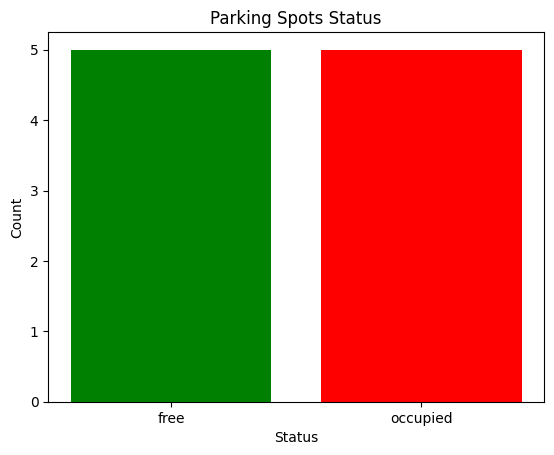

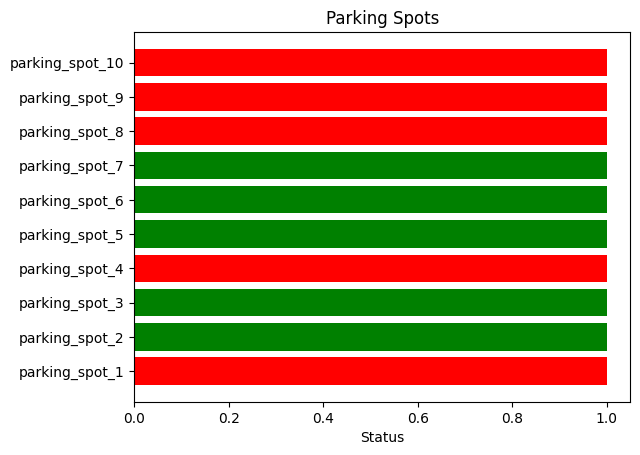

In [21]:
# Import necessary libraries
import requests
import json
import matplotlib.pyplot as plt

# Configuration
ORION_HOST = "http://localhost:1026"
ENTITY_TYPE = "ParkingSpot"

def get_parking_spots():
    """
    Fetches parking spot entities from the Orion Context Broker.
    """
    try:
        url = f"{ORION_HOST}/v2/entities?type={ENTITY_TYPE}"
        headers = {"Accept": "application/json"}
        response = requests.get(url, headers=headers)
        if response.status_code == 200:
            return response.json()
        else:
            print(f"Error fetching data: {response.status_code}")
            return []
    except requests.exceptions.ConnectionError:
        print("Connection to Orion Context Broker failed.")
        return []

def visualize_parking_spots(parking_spots):
    """
    Visualizes the parking spots status using matplotlib.
    """
    statuses = [spot['status']['value'] for spot in parking_spots]
    ids = [spot['id'] for spot in parking_spots]

    # Count the occurrences of each status
    status_counts = {'free': statuses.count('free'), 'occupied': statuses.count('occupied')}

    # Plot the data
    fig, ax = plt.subplots()
    ax.bar(status_counts.keys(), status_counts.values(), color=['green', 'red'])
    ax.set_xlabel('Status')
    ax.set_ylabel('Count')
    ax.set_title('Parking Spots Status')

    plt.show()

    # Plot each parking spot status
    colors = {'free': 'green', 'occupied': 'red'}
    fig, ax = plt.subplots()
    for idx, status in enumerate(statuses):
        ax.barh(ids[idx], 1, color=colors[status])

    ax.set_xlabel('Status')
    ax.set_title('Parking Spots')
    plt.show()

# Fetch parking spot data from Orion
parking_spots = get_parking_spots()

# Visualize the parking spots
visualize_parking_spots(parking_spots)
